In [1]:
# Inicialização

import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import serial
import time
import scipy.signal as sig
import pandas as pd

from matplotlib import animation, rc
from IPython.display import HTML

import scipy.optimize as opt

%matplotlib notebook

Notebook para mostrar todos os dados recolhidos

# SpectraScan

<IPython.core.display.Javascript object>


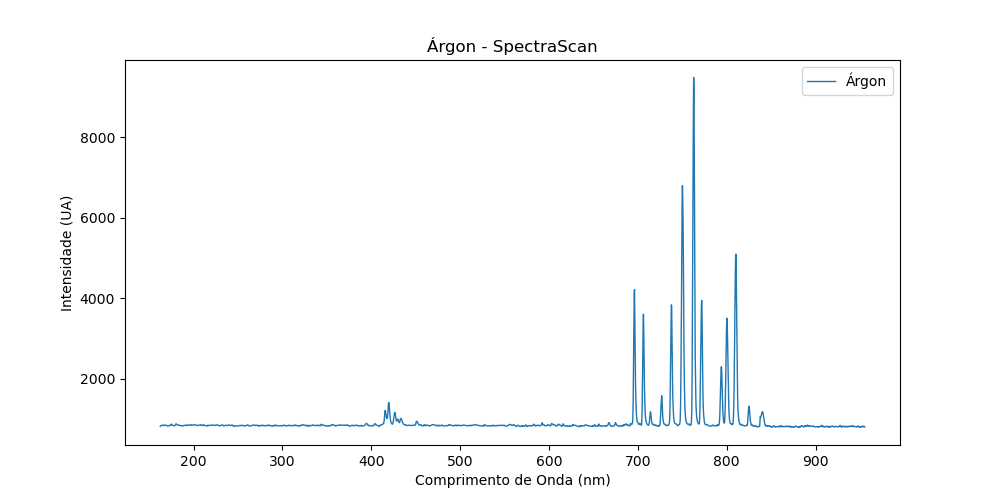

In [3]:
plt.figure(figsize=(10,5))
plt.title("Árgon - SpectraScan")

# Load Argon
M = 2047

wavelenght = np.empty(M)
intensidade = np.empty(M)

tmp = pd.read_csv('DataSpectraScan/scansci0526_5ar.sample', header=None, delim_whitespace=True,skiprows=16) # Escolher um dos espectros em DataSpectraScan
wavelenght = tmp.loc[:,[1]]
wavelenght = np.array((wavelenght))
intensidade = tmp.loc[:,[2]]
intensidade = np.array((intensidade))
intensidade = intensidade.reshape(2048)

plt.plot(wavelenght,intensidade, label = "Árgon",linewidth=1)
plt.xlabel("Comprimento de Onda (nm)")
plt.ylabel("Intensidade (UA)")
plt.legend()
plt.show()

# Mini-Espectrometro

<IPython.core.display.Javascript object>


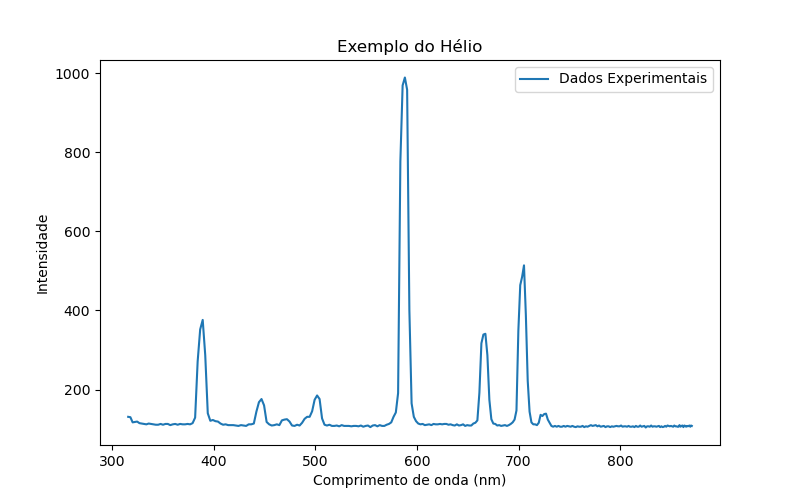

In [4]:
# Load Dados
valMercurio = np.loadtxt("Data/Mercurio")
valHelio = np.loadtxt("Data/Helio")
valNeon = np.loadtxt("Data/Neon")
valKripton = np.loadtxt("Data/Kripton")
valArgon = np.loadtxt("Data/Argon")

# CALIBRACAO
FinalPix = np.array([ 31, 54, 76, 113, 151, 171,190,197,205, 258,226,236]) # pixeis para o ajuste
FinalWav = np.array((388.86,447.14,501.56,587.56,667.81,706.51,738.4,750.93,763.51,842,801,811)) # wavelenghts
deg= 5 # 5º grau dá bons resultados

aj= np.polyfit(FinalPix,FinalWav,deg)[::-1]
ajFinal = np.polynomial.polynomial.Polynomial( aj )

pix = np.arange(0,288)
wav = ajFinal(pix)
plt.figure(figsize=(8,5))
plt.title("Exemplo do Hélio")
plt.plot(wav,valHelio, label = "Dados Experimentais") # Escolher um dos dados de exemplo definidos no início da célula
plt.xlabel("Comprimento de onda (nm)")
plt.ylabel("Intensidade")
plt.legend()
plt.show()